<header style="text-align: center;">
    <h1 style="font-variant: small-caps; padding-bottom: .5em;">
        Diferenças Finitas
    </h1>
</header>
<!-- Endliche Differenzmethode -->

Primeiramente vale comentar um pouco sobre nossa escolha de
### Notação

* $\texttt{n}$ é a quantidade das (idênticas) subdivisões do intervalo de tempo entre $\mathtt{t_0}$ e $\mathtt{t_n}$.


* $\mathbf{t} \, = \, [\mathtt{t_0}, \; \ldots, \; \mathtt{t_n}]^\top \, \equiv \, \mathtt{linspace}( \mathtt{t_0}, \, \mathtt{t_n}, \, n+1); \quad \mathtt{t_j} = \mathtt{t_0} + j \ h, \; h = \dfrac{\mathtt{t_n} - \mathtt{t_0}}{n}$


* $\mathbf{p} \,=\, [p_0, \; \ldots, \; p_n]^\top$ representa o ângulo $\theta$ em cada $\mathtt{t_j}$, enquanto


* $\mathbf{v} \,=\, [v_0, \; \ldots, \; v_n]^\top$ representa a velocidade angular respectiva.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
n, g, L = 200, 9.8, 1.
t0, tn = np.pi, 2.5 * np.pi
p0, v0 = np.pi/24, 0.

### Modelagem do Problema
Escrevendo $x(t) = \pmatrix{p(t) \\ v(t)}$, linearizamos a expressão

$$\dfrac{d}{dt} \pmatrix{p(t) \\ v(t)} = \pmatrix{v(t) \\ -\frac{g}{L} \sin( \, p(t) \, )}$$

pela aproximação $\sin(p(t)) \approx p(t)$, resultando na seguinte equação linear:

$$\dfrac{d}{dt} \pmatrix{p \\ v} = \pmatrix{\;0 & 1 \\ -\frac{g}{L} & 0} \pmatrix{p \\ v},$$

o que resumidamente pode ser escrito como $\dot x = M x$, com o benefício de, por um segundo de distração, esquecermos que $M$ é uma matriz e arriscarmos a solução analítica:
$x(t) = \exp(M \, t) \cdot x_0$, cuja validade deixamos como exercício para o leitor $\ddot\smile$.

Para resolvermos numericamente este problema adaptado, visto que temos uma expressão para a derivada em cada `t`, um caminho interessante começa com aproximações de derivadas: para cada natural $j \in \left[ 0 \, .. N \right]$, seria ótimo descobrirmos um vetor $a=a(j) \in \mathbb{R}^{N+1}$ tal que a aproximação
$$\dfrac{d}{dt} x(j) \approx \sum_{k=0}^N a_k \, x(k)$$
seja tão boa quanto for possível, pois daí surgem $N+1$ identidades lineares que usaremos para obter $x_k \approx x(k)$. Na prática já conhecemos $x_0 = x(t_0)$ e só precisaríamos de $N$ igualdades... cuidaremos desses detalhes mais adiante.

### Um Pouco de Diferenciação Numérica


<span style="float:right;font-style:italic">Sugestão de leitura: http://web.media.mit.edu/~crtaylor/calculator.html</span>

Com um pouco de coragem, para cada $j$ de $0$ a $N$, desenvolvemos:
$$\dfrac{d}{dt} x(j) \approx \sum_{k=0}^N a_k^{(j)} \, x(k) = \sum_{k=0}^N a_k^{(j)} \, x(j + (k-j)) = \sum_{k=0}^N a_k^{(j)} \sum_{l=0}^\infty \dfrac{(k-j)^l}{l!} x^{(l)}(j) = (\ldots)$$
e uma vez que já esperamos que o resultado da soma seja $x^{(1)}(j)$, podemos organizá-la explicitando os diferentes termos $x^{(l)}$ que queremos cancelar ou não, somando primeiro em $l$:
$$(\ldots) = \sum_{l=0}^{??} \sum_{k=0}^N a_k^{(j)} \dfrac{(k-j)^l}{l!} x^{(l)}(j) = 1 \cdot x^{(1)}(j).$$

O caminho natural para tal cancelamento é impor as restrições
$$\sum_{k=0}^N a_k^{(j)} \dfrac{(k-j)^l}{l!} = \begin{cases} 0, \; l \ne 1 \\ 1, \; l=1 \end{cases} \;\, \equiv\; \left[ l=1 \right]$$

(convencionando que $0^0 = 1$... por enquanto tente não pensar muito no porquê. $\ddot\smile$)


Como calcular, então, os $a_k^{(j)}$? *''Simples''* ..., as equações com $l = 0, \ldots, N$ montam o sistema

$$[\mathtt{\left(k-j\right) \ast \ast l} \texttt{ for k in } \mathtt{\left( 0, 1, ..., N \right)}]^\top \cdot a^{(j)} = \left[ l=1 \right]$$

e assim você poderá obter os $a^{(j)}$ com seu *`solver`* preferido de álgebra linear.

Como em geral já conhecemos $x(\mathtt{t_0}) = x_0$, ao aplicar o método de diferenças podemos substituir a primeira linha por $[1, 0, 0, \ldots, 0]$. Se quisermos fazer melhor ainda e dar como conhecidos dois ou mais pontos $[x_0, \ldots, x_\kappa]$ (numa tentativa de melhorar o condicionamento nas linhas iniciais, evitando as aproximações iniciais "forward" de derivadas), podemos substituir $\kappa + 1$ linhas iniciais da matriz de aproximação pelas respectivas primeiras linhas da matriz identidade.

Outras estratégias para lidar com problemas de condicionamento poderiam incluir derivadas da $f(t, x) \left( = \frac{dx}{dt} \right)$ computadas via matemática simbólica, obtendo mais igualdades e resolvendo problemas sobredeterminados com otimização convexa.

In [2]:
np.set_printoptions(precision=3)

In [3]:
n_old = n  # => não bom...
n = 7 # j = 3

# some old printing gambiarra:
# n = 5 ; H = np.arange((n+1)**2, dtype='int') ; def wat(z, j=3): l,k = divmod(z, n+1), return (k-j)**l ; H = wat(H) ; H.resize((n+1, n+1))

def simple_diff_approx(j, n):
    H = np.empty((n+1, n+1), dtype=int)
    H[0, ::] = 1
    for l in range(1, n+1):
        H[l, ::] = np.arange(-j, -j+n+1, dtype=int)**l
    R = np.zeros((n+1))
    R[1] = 1  #significa que [coef. da primeira derivada == 1, e os demais são zero]
    aj = np.linalg.solve(H, R)
    return aj  # Linha `j` da matriz `A`

def diff_approx(j, n, max_order=5):
    if n <= max_order:
        # (Nesse caso não ocorre redução de ordem)
        return simple_diff_approx(j, n)

    # O que fazer quando estamos próximos demais dos extremos de [t0, t1, ..., tn]:
    limit = (max_order-1) // 2
    if j <= limit: ii = np.arange(max_order)
    elif j >= n-limit: ii = np.arange(n-max_order+1, n+1)
    else: ii = np.arange(j-limit, j-limit + max_order)
    jnew = j - ii[0]

    # Chamando o simple_diff_approx com o problema 'reduzido' para max_order:
    coefs = simple_diff_approx(jnew, max_order-1)
    # print(ii, coefs, end="\n\n")

    aj = np.zeros(n+1, dtype=float)
    aj[ii] = coefs
    return aj

build_eq_matrix = lambda N, max_order=5: np.stack((diff_approx(j, N, max_order) for j in range(N+1)))
matriz_ddt_xk = build_eq_matrix(8, max_order=5)

print("Matriz de Aproximação da Primeira Derivada:")
print("  ( ou seja, a matriz M tal que d/dt [x0, x1, ...] \\approx M * [x0, x1, ...] )",\
      str(matriz_ddt_xk), sep="\n\n")

n = n_old  #sorry.

Matriz de Aproximação da Primeira Derivada:
  ( ou seja, a matriz M tal que d/dt [x0, x1, ...] \approx M * [x0, x1, ...] )

[[-2.083  4.    -3.     1.333 -0.25   0.     0.     0.     0.   ]
 [-0.25  -0.833  1.5   -0.5    0.083  0.     0.     0.     0.   ]
 [ 0.083 -0.667  0.     0.667 -0.083  0.     0.     0.     0.   ]
 [ 0.     0.083 -0.667  0.     0.667 -0.083  0.     0.     0.   ]
 [ 0.     0.     0.083 -0.667  0.     0.667 -0.083  0.     0.   ]
 [ 0.     0.     0.     0.083 -0.667  0.     0.667 -0.083  0.   ]
 [ 0.     0.     0.     0.     0.083 -0.667  0.     0.667 -0.083]
 [ 0.     0.     0.     0.    -0.083  0.5   -1.5    0.833  0.25 ]
 [ 0.     0.     0.     0.     0.25  -1.333  3.    -4.     2.083]]


### Primeira Proposta de Solução - Diferenças Centrais

In [4]:
def matrix(n, h, g, l):
    """Monta a matriz de igualdades com diferenças centrais para solução numérica do problema do pêndulo."""
    T = np.zeros((2*n+2, 2*n+2), dtype=float)
    ii = np.arange(2, 2*n, 2)  #>> ii = np.array([2, 4, 6, ..., 2*n-2])
    """
    Legenda para o conjunto de índices `ii`:
    p[k-1] <=> ii-2  ;  v[k-1] <=> ii-1
    p[ k ] <=>  ii   ;  v[ k ] <=> ii+1
    p[k+1] <=> ii+2  ;  v[k+1] <=> ii+3
    """
    T[[0,1], [0,1]] = 1  # (equivalente a T[0,0] = T[1,1] = 1)

    # Primeiro conjunto de igualdades:  v[k] = (p[k+1] - p[k-1]) / (2 h)
    T[ii, ii-2] =  1
    T[ii, ii+1] = 2*h   # (+1) * p[k-1] + (2 h) * v[k] + (-1) * p[k+1] = 0
    T[ii, ii+2] = -1

    # Segundo conjunto de igualdades:  (-g/l) * p[k] = (v[k+1] - v[k-1]) / (2 h)
    T[ii+1,ii-1] =  1
    T[ii+1,ii+3] = -1   # (+1) * v[k-1] + (-2hg/l) * p[k] + (-1) * v[k+1] = 0
    T[ii+1, ii ] = -2*h*g/l

    # A última igualdade, envolvendo os últimos três [p[k], v[k]], é equivalente
    # à aproximação f'(x[-1]) = 1.5 x[-1] - 2.0 x[-2] + 0.5 x[-3], de segunda ordem.
    T[[-2]*6, [-6, -5, -4, -3, -2, -1]] = [1,  0., -4,  0,  3, -2*h]
    T[[-1]*6, [-6, -5, -4, -3, -2, -1]] = [0., 1, 0, -4, 2*h*g/l, 3]
    # Mais detalhes para esta igualdade em paste.ubuntu.com/24448373

    return T

In [5]:
M = np.array([[0., 1.], [-g/L, 0.]])
t = np.linspace(t0, tn, n+1)
h = (tn - t0) / n
p, v = np.zeros((2, n+1))
p[0], v[0] = p0, v0

A = matrix(n, h, g, L)
b = np.zeros_like(A[0])
b[0:2] = [p0, v0]

Solve Time:
CPU times: user 12 ms, sys: 20 ms, total: 32 ms
Wall time: 9.56 ms


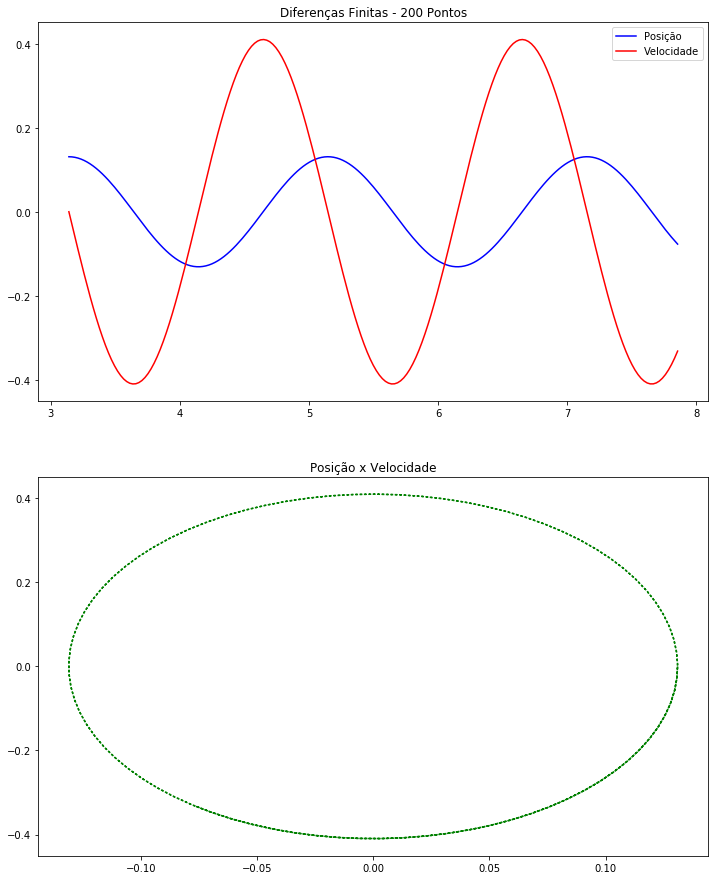

In [6]:
print("Solve Time:")
%time sol = np.linalg.solve(A, b)
p_sol, v_sol = sol[::2], sol[1::2]

plt.figure(figsize=(12, 12/1.618034 * 2 + .5))
plt.subplot(2,1,1)
plt.title("Diferenças Finitas - {} Pontos".format(n))
plt.plot(t, p_sol, 'b', label='Posição')
plt.plot(t, v_sol, 'r', label='Velocidade')
plt.legend(loc=0)
plt.subplot(2,1,2)
plt.title("Posição x Velocidade")
plt.plot(p_sol, v_sol, 'g:')
plt.show()

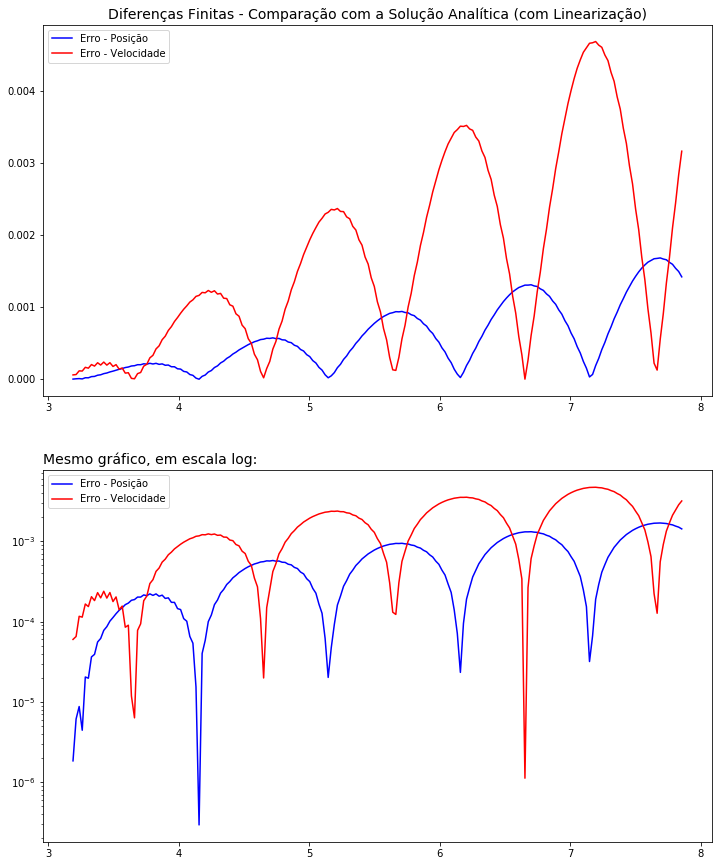

In [7]:
# from scipy.linalg import expm  # tt = 2 ; EM = expm(M * tt)
x0 = np.array([p0, v0])
w, P = np.linalg.eig(M)
invp_x0 = np.linalg.solve(P, x0)

c = np.diag(np.exp(-t0 * w)) @ invp_x0
xt = lambda t: np.real(P @ np.diag(np.exp(t*w)) @ c)

pa, va = np.array([xt(k) for k in t]).T
p_error = abs(pa-p_sol)
v_error = abs(va-v_sol)

plt.figure(figsize=(12, 7.416 * 2 + .2))
plt.subplot(2,1,1)
plt.title("Diferenças Finitas - Comparação com a Solução Analítica (com Linearização)", size=14)
plt.plot(t[2:], p_error[2:], 'b', label='Erro - Posição')
plt.plot(t[2:], v_error[2:], 'r', label='Erro - Velocidade')
plt.legend(loc=0)

plt.subplot(2,1,2)
plt.title("Mesmo gráfico, em escala log:", loc='left', size=14)
plt.semilogy(t[2:], p_error[2:], 'b', label='Erro - Posição')
plt.semilogy(t[2:], v_error[2:], 'r', label='Erro - Velocidade')
plt.legend(loc=0)
plt.show()

### Melhorias Sugeridas:
- #### Implementar o método de diferenças para ordens arbitrárias de aproximação (aproveitando a `build_eq_matrix`);
- #### Implementar a solução decompondo um intervalo grande em subintervalos (de tamanho fixo ou não);
- #### Testar e comparar diferentes valores de `max_order`, diferentes escolhas de subintervalos e número de pontos;
- #### Investigar (analítica e/ou numericamente) o comportamento do erro teórico e/ou numérico do método relativamente a esses parâmetros.

In [8]:
# test_vector = np.array([
#     [1500, 1000, 500],  # number of intervals
#     [   2,    3,   4],  # approximation order
# ], dtype=int).T
# for npts, order in test_vector: pass